In [73]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [105]:
import pandas as pd

documents = pd.read_csv("/content/spam.csv") #https://github.com/SmallLion/Python-Projects/blob/main/Spam-detection/spam.csv
print(documents.columns)
x = documents.iloc[:,1:2]
y = documents.iloc[:,0:1]
IsSpam = {'spam': 1,'ham': 0}
y['v1'] = y['v1'].map(IsSpam)

# x = x['v2'].tolist()
# y = y['v1'].tolist()
print(x)
print(y)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')
                                                     v2
0     Go until jurong point, crazy.. Available only ...
1                         Ok lar... Joking wif u oni...
2     Free entry in 2 a wkly comp to win FA Cup fina...
3     U dun say so early hor... U c already then say...
4     Nah I don't think he goes to usf, he lives aro...
...                                                 ...
5567  This is the 2nd time we have tried 2 contact u...
5568              Will Ì_ b going to esplanade fr home?
5569  Pity, * was in mood for that. So...any other s...
5570  The guy did some bitching but I acted like i'd...
5571                         Rofl. Its true to its name

[5572 rows x 1 columns]
      v1
0      0
1      0
2      1
3      0
4      0
...   ..
5567   1
5568   0
5569   0
5570   0
5571   0

[5572 rows x 1 columns]


<ipython-input-105-08ae29480b40>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['v1'] = y['v1'].map(IsSpam)


In [106]:
def remove_stop_words(text):
    text = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word.isalpha() and not word in stop_words]
    return ' '.join(text)

x = x.apply(lambda row: remove_stop_words(row['v2']), axis=1)
print(x)
print(y)

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts may...
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
                              ...                        
5567    time tried contact u pound prize claim easy ca...
5568                            b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Length: 5572, dtype: object
      v1
0      0
1      0
2      1
3      0
4      0
...   ..
5567   1
5568   0
5569   0
5570   0
5571   0

[5572 rows x 1 columns]


In [107]:
max_words = 20000
max_length = 500
tokenizer = Tokenizer(max_words)
tokenizer.fit_on_texts(x)
sequences = tokenizer.texts_to_sequences(x)
x = pad_sequences(sequences, maxlen= max_length)
print(x)

[[   0    0    0 ...   11 3570   59]
 [   0    0    0 ...  322    1 1586]
 [   0    0    0 ...  367   56  271]
 ...
 [   0    0    0 ... 7154 1056 7155]
 [   0    0    0 ...  807  115    8]
 [   0    0    0 ... 2172  347  160]]


In [108]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Embedding
 
model = Sequential() 
model.add(Embedding(max_words, 32, input_length=max_length)) 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 500, 32)           640000    
                                                                 
 flatten_8 (Flatten)         (None, 16000)             0         
                                                                 
 dense_16 (Dense)            (None, 128)               2048128   
                                                                 
 dense_17 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,688,257
Trainable params: 2,688,257
Non-trainable params: 0
_________________________________________________________________


In [109]:
import numpy as np
x = np.array(x)
y = np.array(y)
print(x)
print(y)
hist = model.fit(x, y, validation_split=0.2, epochs=20, batch_size=10)

[[   0    0    0 ...   11 3570   59]
 [   0    0    0 ...  322    1 1586]
 [   0    0    0 ...  367   56  271]
 ...
 [   0    0    0 ... 7154 1056 7155]
 [   0    0    0 ...  807  115    8]
 [   0    0    0 ... 2172  347  160]]
[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]
Epoch 1/20
446/446 [==============================] - 22s 47ms/step - loss: 0.1675 - accuracy: 0.9444 - val_loss: 0.0711 - val_accuracy: 0.9803
Epoch 2/20
446/446 [==============================] - 17s 38ms/step - loss: 0.0324 - accuracy: 0.9895 - val_loss: 0.0671 - val_accuracy: 0.9848
Epoch 3/20
446/446 [==============================] - 19s 42ms/step - loss: 0.0101 - accuracy: 0.9971 - val_loss: 0.0715 - val_accuracy: 0.9767
Epoch 4/20
446/446 [==============================] - 17s 39ms/step - loss: 0.0051 - accuracy: 0.9987 - val_loss: 0.0791 - val_accuracy: 0.9785
Epoch 5/20
446/446 [==============================] - 17s 38ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0842 - val_accuracy: 0.9803
Epoch 6/20
446/4

[]

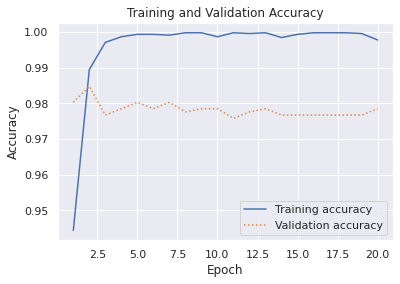

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [116]:
incorrects = np.nonzero(model.predict(x).reshape((-1,)) != y)


175/175 [==============================] - 3s 16ms/step


In [117]:
print(incorrects)

(array([   0,    0,    0, ..., 5571, 5571, 5571]), array([   0,    1,    2, ..., 5569, 5570, 5571]))


In [122]:
cleaned_text = remove_stop_words('Can you attend a code review on Tuesday? Need to make sure the logic is rock solid.')
sequence = tokenizer.texts_to_sequences([cleaned_text])
padded_sequence = pad_sequences(sequence, maxlen=max_length)
prediction = model.predict(padded_sequence)
print(prediction, y[np.argmax(prediction)])

1/1 [==============================] - 0s 25ms/step
[[3.1238488e-13]] [0]


In [118]:
cleaned_text = remove_stop_words('Why pay more for expensive meds when you can order them online and save $$$?')
sequence = tokenizer.texts_to_sequences([cleaned_text])
padded_sequence = pad_sequences(sequence, maxlen=max_length)
model.predict(padded_sequence)

1/1 [==============================] - 0s 76ms/step


array([[1.5281547e-07]], dtype=float32)